# House Price Prediction

### Backgroung

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, I predict the final price of each home.

## Preprocessing

In [1]:
#import the packages that I want to use 

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [296]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
n = train.shape[0]

In [297]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [298]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [299]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [300]:
# get the Id for train and test set
train_Id = train['Id']
test_Id = test['Id']
y_train = train['SalePrice']
train.drop('Id', axis=1,inplace=True)
test.drop('Id', axis=1, inplace=True)

In [301]:
# combine train and test data for processing
data = pd.concat((train,test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

In [302]:
data.shape

(2919, 79)

### Visualize

In [303]:
sns.set_style('whitegrid')

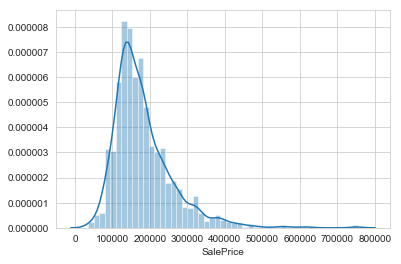

In [304]:
sns.distplot(y_train)

Linear models assume that the distribution for the response should be normal so I transformed the SalePrice with log function.

In [305]:
y_train = np.log1p(y_train)

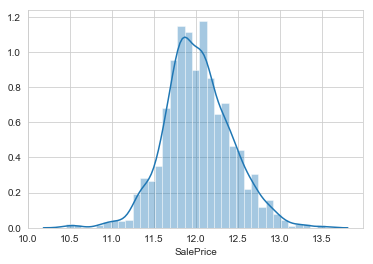

In [306]:
sns.distplot(y_train)

### Missing Data

I dropped the variable which has more than 80% missing data.

In [307]:
missing = (data.isnull().sum()/ data.isnull().count()).sort_values(ascending=False)
missing = pd.DataFrame({'missing percentage':missing})

In [308]:
missing.head(40)

,missing percentage
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468
LotFrontage,0.166495
GarageFinish,0.054471
GarageQual,0.054471
GarageYrBlt,0.054471
GarageCond,0.054471


In [309]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

For remain variables, I filled out based on the conditions.
1. For numeric variables, I used mean or median to replace with the None.
2. For categorical variables, I used proportion category to replace with the None.

A. Fill the variable 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' with None.

In [310]:
for i in ('FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType',
         'MSSubClass','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[i] = data[i].fillna('None')

B. Fill the variable 'GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' with 0

In [311]:
for j in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    data[j] = data[j].fillna(0)

C. Some variables just miss one or two values so I fill it with the most common values.      
MSZoning: 'RL' is the most common value so I fill in missing values with 'RL'

In [312]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

In [313]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

D. Numeric variable         
LotFrontage : I fill in the missing values according to the meadian LotFrontage of the neighborhood because the variable have a similar value to its neighborhood.

In [314]:
#group by neighborhood and apply the median of the neighbor
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

E. Other special variables          
Utilities: For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA. This feature won't help in the prediction and I removed it.            
Functional: data description says NA means typical         

In [315]:
data = data.drop(['Utilities'], axis=1)
data["Functional"] = data["Functional"].fillna("Typ")

In [316]:
missing1 = (data.isnull().sum()/ data.isnull().count()).sort_values(ascending=False)
missing1 = pd.DataFrame({'missing percentage':missing1})

In [317]:
missing1.head()

,missing percentage
YrSold,0.0
Electrical,0.0
ExterCond,0.0
ExterQual,0.0
Exterior1st,0.0


### Getting dummy variables

In [318]:
data = pd.get_dummies(data)

In [319]:
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,0,1
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,0,1
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,0,1
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,0,1
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,0,1
5,796,566,320,1,732.0,0.0,1.0,0.0,64.0,0,...,0,0,0,0,0,0,0,1,0,1
6,1694,0,0,3,1369.0,0.0,1.0,0.0,317.0,0,...,0,0,0,0,0,0,0,1,0,1
7,1107,983,0,3,859.0,32.0,1.0,0.0,216.0,228,...,0,0,0,0,0,0,0,1,0,1
8,1022,752,0,2,0.0,0.0,0.0,0.0,952.0,205,...,0,0,0,0,0,0,0,1,0,1
9,1077,0,0,2,851.0,0.0,1.0,0.0,140.0,0,...,0,0,0,0,0,0,0,1,0,1


In [320]:
data.shape

(2919, 283)

In [321]:
#split train and test set
train = data[:n]
test = data[n:]

In [322]:
data.shape

(2919, 283)

In [323]:
train.shape

(1460, 283)

## Modeling

In [324]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

### Linear Regression

### Lasso

In [325]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

### Elastic Net

In [326]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3610))

### Ridge

In [327]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [328]:
#cross validation to calculate the rmse
n_folds = 5

In [329]:
kf = KFold(n_folds, shuffle=True, random_state=3610).get_n_splits(train.values)

In [330]:
rmse= np.sqrt(-cross_val_score(ENet, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))

In [331]:
print(rmse.mean())

0.13552343356999683


### submission

In [332]:
fitted = lasso.fit(train, y_train)

In [333]:
predictions = lasso.predict(test)

In [334]:
predictions = np.exp(predictions)

In [335]:
sub = pd.DataFrame()
sub['Id'] = test_Id
sub['SalePrice'] = predictions
sub.to_csv('submission.csv',index=False)